# Tutorial - Run DE on simulated data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import delnx as dx

In [3]:
import plotly.io as pio
pio.renderers.default = 'iframe'

In [4]:
def adata_small():
    """Create small test data for testing on the single-cell level."""
    # Use our synthetic data generator with adjusted parameters
    n_cells = 1000
    n_genes = 500
    n_samples = 2

    adata = dx.ds.synthetic_adata(
        n_cells=n_cells,
        n_genes=n_genes,
        n_cell_types=3,
        n_de_genes=100,
        mean_counts=20,
        dispersion=0.3,
        dropout_rate=0.3,
        n_samples=n_samples,
        random_seed=42,
    )

    # Add some additional metadata for testing
    adata.obs["continuous_covar"] = np.random.normal(size=adata.n_obs)
    adata.layers["binary"] = adata.X.copy()
    adata.layers["binary"] = (adata.layers["binary"] > 0).astype(int)

    return adata

In [5]:
adata = adata_small()

In [6]:
de_results = dx.tl.de(
        adata,
        condition_key="condition",
        method="binomial",
        backend="statsmodels",
        reference="control",
        data_type="binary",
        layer="binary",
        log2fc_threshold=0.0,
    )

Using specified data type: binary
500 features passed log2fc threshold of 0.0


100%|██████████| 500/500 [00:02<00:00, 176.43it/s]
INFO:2025-06-20 11:26:16,234:jax._src.xla_bridge:752: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
2025-06-20 11:26:16 | [INFO] Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
2025-06-20 11:26:16 | [WARNING] An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [7]:
dx.pp.label_de_genes(de_results)

In [8]:
top_up, top_down = dx.pp.get_top_de_genes(de_results)

In [9]:
#dx.pl.volcanoplot(de_results)

In [9]:
var_names = top_up + top_down

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import importlib
importlib.reload(dx)

<module 'delnx' from '/pmount/projects/site/pred/ihb-g-deco/USERS/adaml9/delnx/src/delnx/__init__.py'>

In [12]:
import matplotlib.pyplot as plt
from delnx.pl import volcanoplot, matrixplot

In [13]:
fig = dx.pl.matrixplot(
        adata,
        var_names=var_names,
        groupby=["condition", "cell_type"],
        layer="binary",
        cmap="viridis",
        standard_scale="var",
        vmin=0,
        vmax=1,
        return_fig=True,  # required for testability
        show=False,       # prevent blocking
    )

... storing 'cell_type' as categorical
... storing 'condition' as categorical
... storing 'sample' as categorical
... storing 'condition_sample' as categorical


                         condition    cell_type
control | cell_type_0      control  cell_type_0
control | cell_type_1      control  cell_type_1
control | cell_type_2      control  cell_type_2
treatment | cell_type_0  treatment  cell_type_0
treatment | cell_type_1  treatment  cell_type_1
treatment | cell_type_2  treatment  cell_type_2


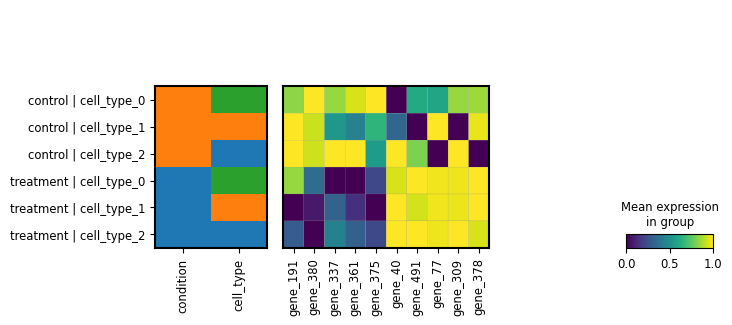

In [14]:
fig.show()